## 데이터 분석 및 전처리

### 데이터 불러오기 및 분석하기
* 데이터 크기
* 데이터 개수
* 각 리뷰 문자 길이 분포
* 많이 사용한 단어
* 긍/부정 데이터 분포
* 각 리뷰 단어 개수 분포
* 특수문자 및 대 대/소문자 비율

In [11]:
import zipfile

In [12]:
DATA_IN_PATH = './data_in/'

In [20]:
file_list = ['labeledTrainData.tsv.zip', 'unlabeledTrainData.tsv.zip', 'testData.tsv.zip']
for file in file_list:
    zipRef = zipfile.ZipFile(DATA_IN_PATH + file, 'r')
    zipRef.extractall(DATA_IN_PATH)
    zipRef.close()

In [21]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

### 데이터 크기

In [23]:
# quoting : 0(default) : 인용구 관련, '', ""는 읽지 않고 내부값만 출력, 3 : "", ''를 출력
train_data = pd.read_csv( DATA_IN_PATH + 'labeledTrainData.tsv', header = 0, \
                         delimiter = '\t', quoting = 3)
train_data.head()

,id,sentiment,review
0,"""5814_8""",1,"""With all this stuff going down at the moment ..."
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ..."
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell..."
3,"""3630_4""",0,"""It must be assumed that those who praised thi..."
4,"""9495_8""",1,"""Superbly trashy and wondrously unpretentious ..."


In [24]:
print("파일 크기 : ")
for file in os.listdir(DATA_IN_PATH):
    if 'tsv' in file and 'zip' not in file:
        print(file.ljust(30) + str(round(os.path.getsize(DATA_IN_PATH + file) / 1000000, 2)) + 'MB')

파일 크기 : 
labeledTrainData.tsv          33.56MB
testData.tsv                  32.72MB
unlabeledTrainData.tsv        67.28MB


### 데이터 개수

In [25]:
print('전체 학습데이터의 개수: {}'.format(len(train_data)))


전체 학습데이터의 개수: 25000


0        2304
1         948
2        2451
3        2247
4        2233
         ... 
24995     582
24996     977
24997     643
24998    1143
24999     944
Name: review, Length: 25000, dtype: int64

### 각 리뷰 문자 길이 분포

In [26]:
train_length = train_data['review'].apply(len)
train_length

0        2304
1         948
2        2451
3        2247
4        2233
         ... 
24995     582
24996     977
24997     643
24998    1143
24999     944
Name: review, Length: 25000, dtype: int64

Text(0, 0.5, 'Number of review')

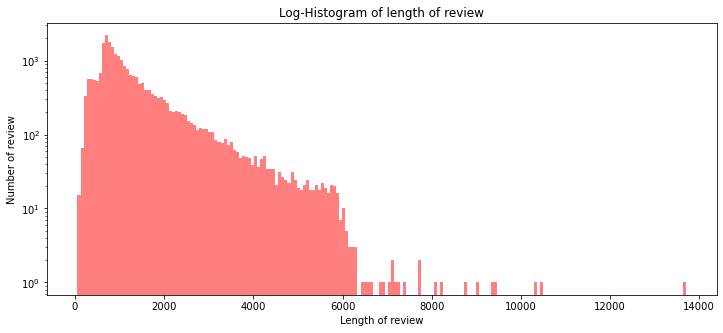

In [28]:
plt.figure(figsize=(12, 5))
plt.hist(train_length, bins=200, alpha=0.5, color= 'r', label='word')
plt.yscale('log', nonpositive='clip')

plt.title('Log-Histogram of length of review')
plt.xlabel('Length of review')

plt.ylabel('Number of review')

In [29]:
print('리뷰 길이 최대 값: {}'.format(np.max(train_length)))
print('리뷰 길이 최소 값: {}'.format(np.min(train_length)))
print('리뷰 길이 평균 값: {:.2f}'.format(np.mean(train_length)))
print('리뷰 길이 표준편차: {:.2f}'.format(np.std(train_length)))
print('리뷰 길이 중간 값: {}'.format(np.median(train_length)))
# 사분위의 대한 경우는 0~100 스케일로 되어있음
print('리뷰 길이 제 1 사분위: {}'.format(np.percentile(train_length, 25)))
print('리뷰 길이 제 3 사분위: {}'.format(np.percentile(train_length, 75)))

리뷰 길이 최대 값: 13710
리뷰 길이 최소 값: 54
리뷰 길이 평균 값: 1329.71
리뷰 길이 표준편차: 1005.22
리뷰 길이 중간 값: 983.0
리뷰 길이 제 1 사분위: 705.0
리뷰 길이 제 3 사분위: 1619.0


{'whiskers': [<matplotlib.lines.Line2D at 0x1bf2ba68b20>,
 'caps': [<matplotlib.lines.Line2D at 0x1bf2ba741c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1bf2ba68850>],
 'medians': [<matplotlib.lines.Line2D at 0x1bf2ba746a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1bf2ba74c40>],
 'means': [<matplotlib.lines.Line2D at 0x1bf2ba74970>]}

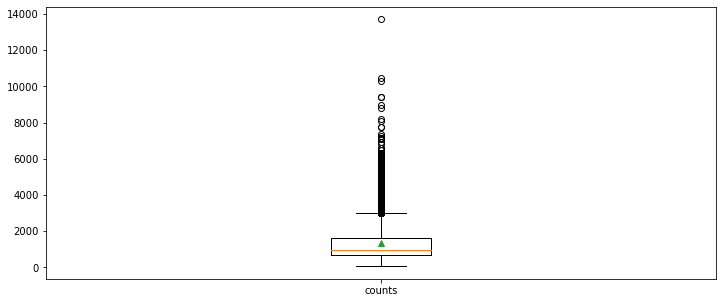

In [30]:
# showmeans=True : 평균표시
plt.figure(figsize=(12, 5))
plt.boxplot(train_length,
             labels=['counts'],
             showmeans=True)

(-0.5, 799.5, 599.5, -0.5)

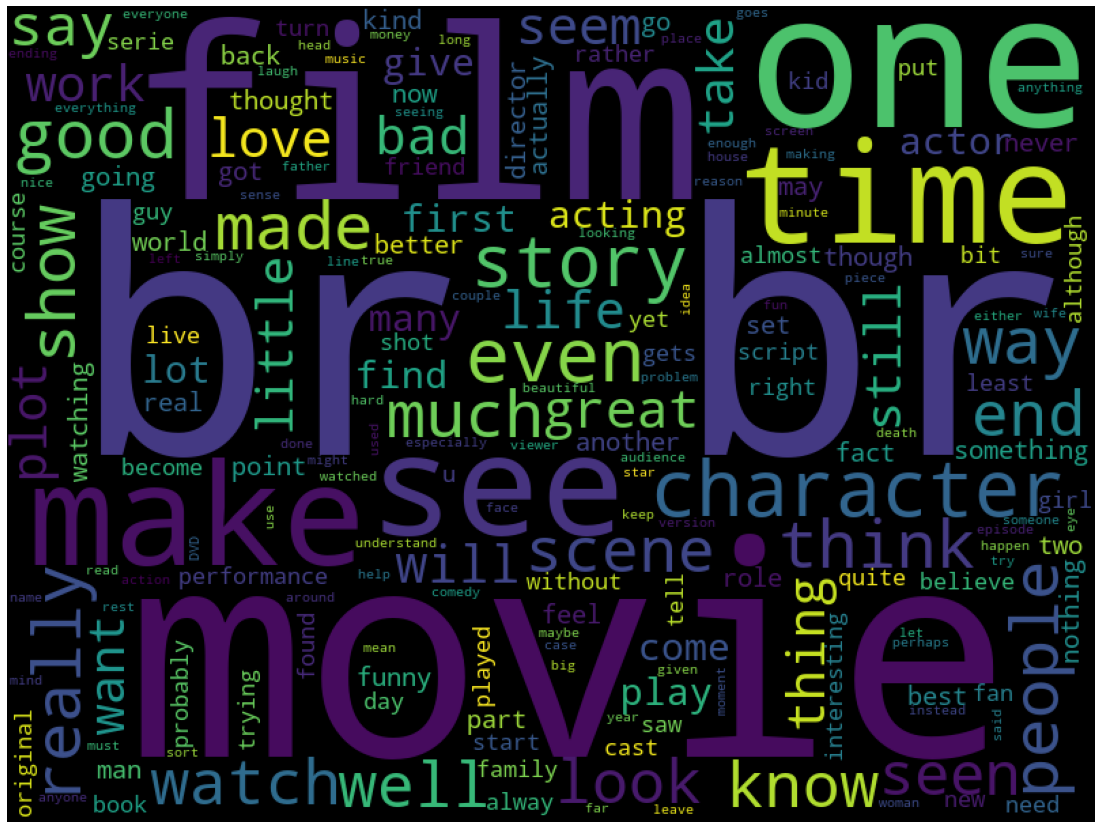

In [41]:
from wordcloud import WordCloud

cloud = WordCloud(width=800, height=600).generate(" ".join(train_data['review']))
plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.axis('off')

### 긍, 부정 데이터 분포

C:\Users\virtue\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sentiment', ylabel='count'>

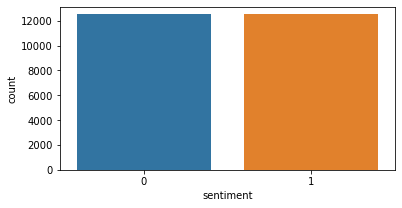

In [32]:
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(6,3)
sns.countplot(train_data['sentiment'])

In [35]:
print("긍정 리뷰 개수: {}".format(train_data['sentiment'].value_counts()[1]))
print("부정 리뷰 개수: {}".format(train_data['sentiment'].value_counts()[0]))

긍정 리뷰 개수: 12500
부정 리뷰 개수: 12500


### 각 리뷰 단어 개수 분포

In [39]:
train_word_counts = train_data['review'].apply(lambda x: len(x.split(' ')))
train_word_counts

0        433
1        158
2        378
3        379
4        367
        ... 
24995     95
24996    174
24997    127
24998    197
24999    184
Name: review, Length: 25000, dtype: int64

Text(0, 0.5, 'Number of reviews')

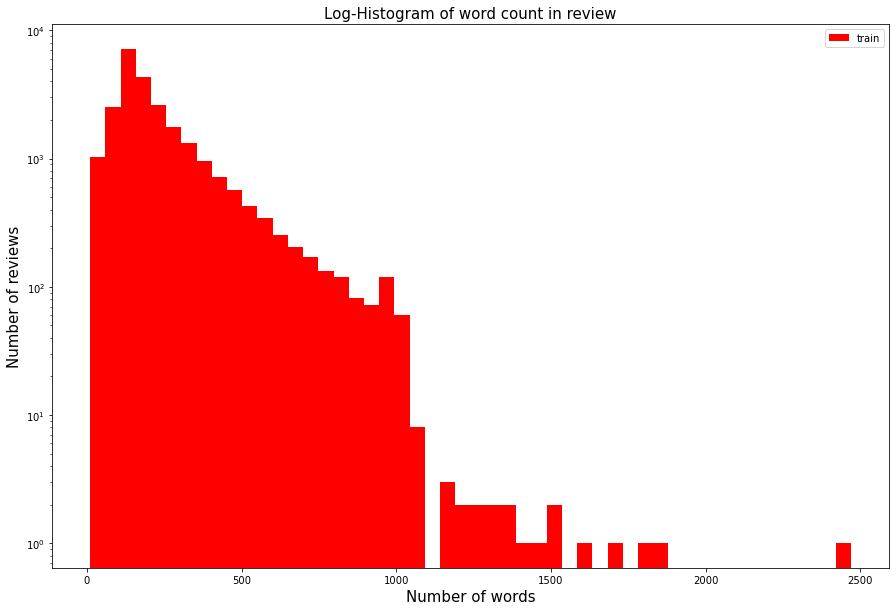

In [48]:
plt.figure(figsize=(15, 10))
plt.hist(train_word_counts, bins=50, facecolor='r',label='train')
plt.title('Log-Histogram of word count in review', fontsize=15)
plt.yscale('log', nonpositive='clip')
plt.legend()
plt.xlabel('Number of words', fontsize=15)
plt.ylabel('Number of reviews', fontsize=15)

In [49]:
print('리뷰 단어 개수 최대 값: {}'.format(np.max(train_word_counts)))
print('리뷰 단어 개수 최소 값: {}'.format(np.min(train_word_counts)))
print('리뷰 단어 개수 평균 값: {:.2f}'.format(np.mean(train_word_counts)))
print('리뷰 단어 개수 표준편차: {:.2f}'.format(np.std(train_word_counts)))
print('리뷰 단어 개수 중간 값: {}'.format(np.median(train_word_counts)))
# 사분위의 대한 경우는 0~100 스케일로 되어있음
print('리뷰 단어 개수 제 1 사분위: {}'.format(np.percentile(train_word_counts, 25)))
print('리뷰 단어 개수 제 3 사분위: {}'.format(np.percentile(train_word_counts, 75)))

리뷰 단어 개수 최대 값: 2470
리뷰 단어 개수 최소 값: 10
리뷰 단어 개수 평균 값: 233.79
리뷰 단어 개수 표준편차: 173.74
리뷰 단어 개수 중간 값: 174.0
리뷰 단어 개수 제 1 사분위: 127.0
리뷰 단어 개수 제 3 사분위: 284.0


### 특수문자 및 대,소문자 비율

In [50]:
qmarks = np.mean(train_data['review'].apply(lambda x: '?' in x))
print('물음표가있는 질문: {:.2f}%'.format(qmarks * 100))
fullstop = np.mean(train_data['review'].apply(lambda x: '.' in x))
print('마침표가 있는 질문: {:.2f}%'.format(fullstop * 100))
capital_first = np.mean(train_data['review'].apply(lambda x: x[0].isupper()))
print('첫 글자가 대문자 인 질문: {:.2f}%'.format(capital_first * 100))
capitals = np.mean(train_data['review'].apply(lambda x: max([y.isupper() for y in x]))) # 대문자가 몇개
print('대문자가있는 질문: {:.2f}%'.format(capitals * 100))
numbers = np.mean(train_data['review'].apply(lambda x: max([y.isdigit() for y in x]))) # 숫자가 몇개
print('숫자가있는 질문: {:.2f}%'.format(numbers * 100))

# 데이터 eda 한것

물음표가있는 질문: 29.55%
마침표가 있는 질문: 99.69%
첫 글자가 대문자 인 질문: 0.00%
대문자가있는 질문: 99.59%
숫자가있는 질문: 56.66%


In [51]:
import re
import json
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

In [52]:
DATA_IN_PATH = './data_in/'
train_data = pd.read_csv( DATA_IN_PATH + 'labeledTrainData.tsv', header = 0, \
                         delimiter = '\t', quoting = 3)
print(train_data['review'][0])

"With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.<br /><br />The actual feature film bit when it finally sta

### 데이터 전처리

### 불용어 처리

## exercise 

In [38]:
import pandas as pd

df = pd.read_csv("a.csv", delimiter='\t', quoting=3)
df

,c0,c1,c2,c3
0,0,1,3,"""ddd"""
1,1,2,3,"""ooo"""
2,2,2,2,"""ddd"""


### 특수문자 및 대, 소문자 비율

In [42]:
qmarks = np.mean(train_data['review'].apply(lambda x: '?' in x))
print('물음표가있는 질문: {:.2f}%'.format(qmarks * 100))

fullstop = np.mean(train_data['review'].apply(lambda x: '.' in x))
print('마침표가 있는 질문: {:.2f}%'.format(fullstop * 100))

capital_first = np.mean(train_data['review'].apply(lambda x: x[0].isupper()))
print('첫 글자가 대문자 인 질문: {:.2f}%'.format(capital_first * 100))
capitals = np.mean(train_data['review'].apply(lambda x: max([y.isupper() for y in x]))) # 대문자가 몇개
print('대문자가있는 질문: {:.2f}%'.format(capitals * 100))
numbers = np.mean(train_data['review'].apply(lambda x: max([y.isdigit() for y in x]))) # 숫자가 몇개
print('숫자가있는 질문: {:.2f}%'.format(numbers * 100))

물음표가있는 질문: 29.55%
마침표가 있는 질문: 99.69%
첫 글자가 대문자 인 질문: 0.00%
대문자가있는 질문: 99.59%
숫자가있는 질문: 56.66%


In [44]:
DATA_IN_PATH = './data_in/'
train_data = pd.read_csv( DATA_IN_PATH + 'labeledTrainData.tsv', header = 0, \
                         delimiter = '\t', quoting = 3)
print(train_data['review'][0])

"With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.<br /><br />The actual feature film bit when it finally sta

In [47]:
review = train_data['review'][0]
review_text = BeautifulSoup(review,"html.parser").get_text() # HTML 태그 제거
# 영어문자 제외한 나머지 모두 공백 처리
review_text = re.sub("[^a-zA-Z]", " ", review_text)
review_text

' With all this stuff going down at the moment with MJ i ve started listening to his music  watching the odd documentary here and there  watched The Wiz and watched Moonwalker again  Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent  Moonwalker is part biography  part feature film which i remember going to see at the cinema when it was originally released  Some of it has subtle messages about MJ s feeling towards the press and also the obvious message of drugs are bad m kay Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring  Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him The actual feature film bit when it finally starts is only on for    m